# Analisa Data Tagihan Kesehatan Personal

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statistics import variance
import numpy as np

Pada file ini akan dilakukan analisa pada data tagihan kesehatan personal dari suatu perusahaan asuransi. Data ini menunjukkan besarnya tagihan yang harus dibayarkan oleh nasabah kepada asuransi. Berikut merupakan list dari kolom pada data tersebut:
- __age__ <br>
    Umur dari penerima manfaat asuransi
- __sex__ <br>
    gender, terdiri dari female & male
- __bmi__ <br>
    body mass index, besaran ideal berada pada rentang 18.5 - 24.9
- __children__ <br>
    Jumlah anak yang ditanggung oleh asuransi
- __smoker__ <br>
    Apakah nasabah merokok atau tidak?
- __region__ <br>
    tempat tinggal nasabah di US, ada 4: northeast, southeast, southwest, northwest
- __charges__ <br>
    Biaya yang ditagih kepada nasabah untuk dibayarkan ke asuransi  

In [2]:
#read data
asuransi = pd.read_csv("insurance.csv")
asuransi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
asuransi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dapat dilihat pada data info(), bahwa tipe kolom sudah sesuai, dan tidak terdapat data hilang, sehingga data dapat digunakan langsung.

## Research Question

Pada research question, akan dilakukan 3 analisa, yaitu analisa deskriptif statistik, analisa variabel diskrit, analisa variabel kontinu, analisa korelasi variabel, dan pengujian hipotesis.

### Analisa Deskriptif Statistik

Analisa deskriptif statistik yang akan dilakukan antara lain:

a. Ringkasan statistik dari data yang digunakan? <br>
b. Berapa rata-rata nilai BMI dari yang merokok? <br>
c. Apakah standar deviasi dari tagihan kesehatan perokok dan non perokok sama? <br>
d. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama? <br>
e. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non merokok? <br>


#### a. Ringkasan statistik dari data yang digunakan?

In [4]:
asuransi.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Dari ringkasan statistik menggunakan fungsi describe(), didapatkan nilai mean sebagai berikut:
- age: 39.2 tahun
- bmi: 30.66
- charges: USD 13,270

Dengan standar deviasi (std) sebagai berikut:
- age: 14 tahun
- bmi: 6.09
- charges: USD 12,110

Dari data mean dan std, dapat dilihat bahwa data charges sangat memiliki variasi yang besar, karena nilai std nya hampir mendekat nilai mean-nya. Sementara itu, untuk umur memiliki rentang data dari 18-64 tahun, yang merupakan umur produktif. Untuk data bmi, memiliki rata-rata yang cukup tinggi hingga 30.66 dengan std 6.09, hal ini dapat terjadi jika banyak nasabah asuransi yang memiliki berat di atas dari berat ideal, yang tentu saja akan berpengaruh terhadap nilai yang akan ditagihkan.

#### b. Berapa rata-rata nilai BMI dari yang merokok? 

In [5]:
#filter data perokok
asuransi_perokok = asuransi[asuransi["smoker"] == "yes"]
asuransi_perokok.describe().T

,count,mean,std,min,25%,50%,75%,max
age,274.0,38.514599,13.923186,18.0000,27.000000,38.00000,49.000000,64.00000
bmi,274.0,30.708449,6.318644,17.1950,26.083750,30.44750,35.200000,52.58000
children,274.0,1.113139,1.157066,0.0000,0.000000,1.00000,2.000000,5.00000
charges,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


Dari hasil di atas, dapat dilihat bahwa rata-rata umur perokok yang menjadi nasabah adalah 38.5 Tahun, dan rata-rata bmi-nya sebesar __30.71__.

#### c. Apakah standar deviasi dari tagihan kesehatan perokok dan non perokok sama? 

In [6]:
#filter data non perokok
asuransi_non_perokok = asuransi[asuransi["smoker"] == "no"]
asuransi_non_perokok.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1064.0,39.385338,14.083410,18.0000,26.7500,40.0000,52.00000,64.00000
bmi,1064.0,30.651795,6.043111,15.9600,26.3150,30.3525,34.43000,53.13000
children,1064.0,1.090226,1.218136,0.0000,0.0000,1.0000,2.00000,5.00000
charges,1064.0,8434.268298,5993.781819,1121.8739,3986.4387,7345.4053,11362.88705,36910.60803


Dari kedua informasi yang telah ada di atas, didapatkan bahwa standar deviasi charges/tagihan untuk masing-masing data antara lain:
- std Tagihan Perokok : __USD 11,541.55__
- std Tagihan Non Perokok: __USD 5,993.78__

Pada data tersebut, dapat dilihat bahwa tagihan untuk nasabah non perokok lebih murah dibandingkan dengan nasabah perokok, dengan selisih sebesar: __USD 5,547.77__.

#### d. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama? 

In [7]:
#Dari data perokok akan dilakukan pemisahan perempuan & laki-laki
#menggunakan pivot table
asuransi_perokok.pivot_table(values="age", index="sex", aggfunc="mean")

,age
sex,
female,38.608696
male,38.446541


Menggunakan pivot table didapatkan rata-rata umur perokok untuk laki-laki & perempuan tidak terlampau jauh dapat dikatakan sama, berada di sekitar umur __38 Tahun__.

#### e. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non merokok?

In [133]:
asuransi.pivot_table(values="charges", index="smoker", aggfunc="mean")

,charges
smoker,
no,8434.268298
yes,32050.231832


Dari nilai di atas, didapatkan bahwa rata-rata nilai tagihan perokok lebih besar daripada non perokok, dengan tagihan perokok sebesar USD 32,050 dan tagihan non perokok USD 8,434.

### Analisa Variabel Diskrit

Analisa Variabel diskrit yang akan dilakukan antara lain:

a. Gender mana yang memiliki tagihan paling tinggi? <br>
b. Distribusi peluang tagihan di tiap-tiap region? <br>
c. Apakah setiap region memiliki proporsi data banyak orang yang sama? <br>
d. Mana yang lebih tinggi proporsi perokok atau non perokok? <br>
e. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok? <br>

#### a. Gender mana yang memiliki tagihan paling tinggi? 

In [134]:
#Dari data perokok akan dilakukan pemisahan perempuan & laki-laki
#menggunakan pivot table
asuransi.pivot_table(values="charges", index="sex", aggfunc=["max", "mean", "median", "std"])

,max,mean,median,std
,charges,charges,charges,charges
sex,,,,
female,63770.42801,12569.578844,9412.96250,11128.703801
male,62592.87309,13956.751178,9369.61575,12971.025915


<AxesSubplot:xlabel='charges', ylabel='Count'>

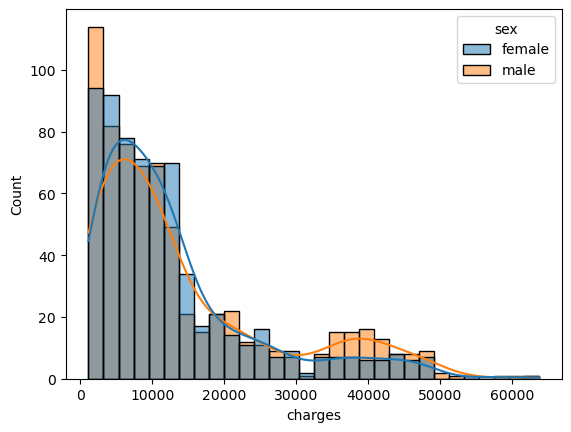

In [9]:
sns.histplot(asuransi, x="charges", kde=True, hue="sex")

Dari 2 analisa di atas, didapatkan bahwa tagihan paling tinggi dimiliki oleh __female__. Keduanya memiliki bentuk distribusi yang hampir serupa. 

#### b. Distribusi peluang tagihan di tiap-tiap region? 

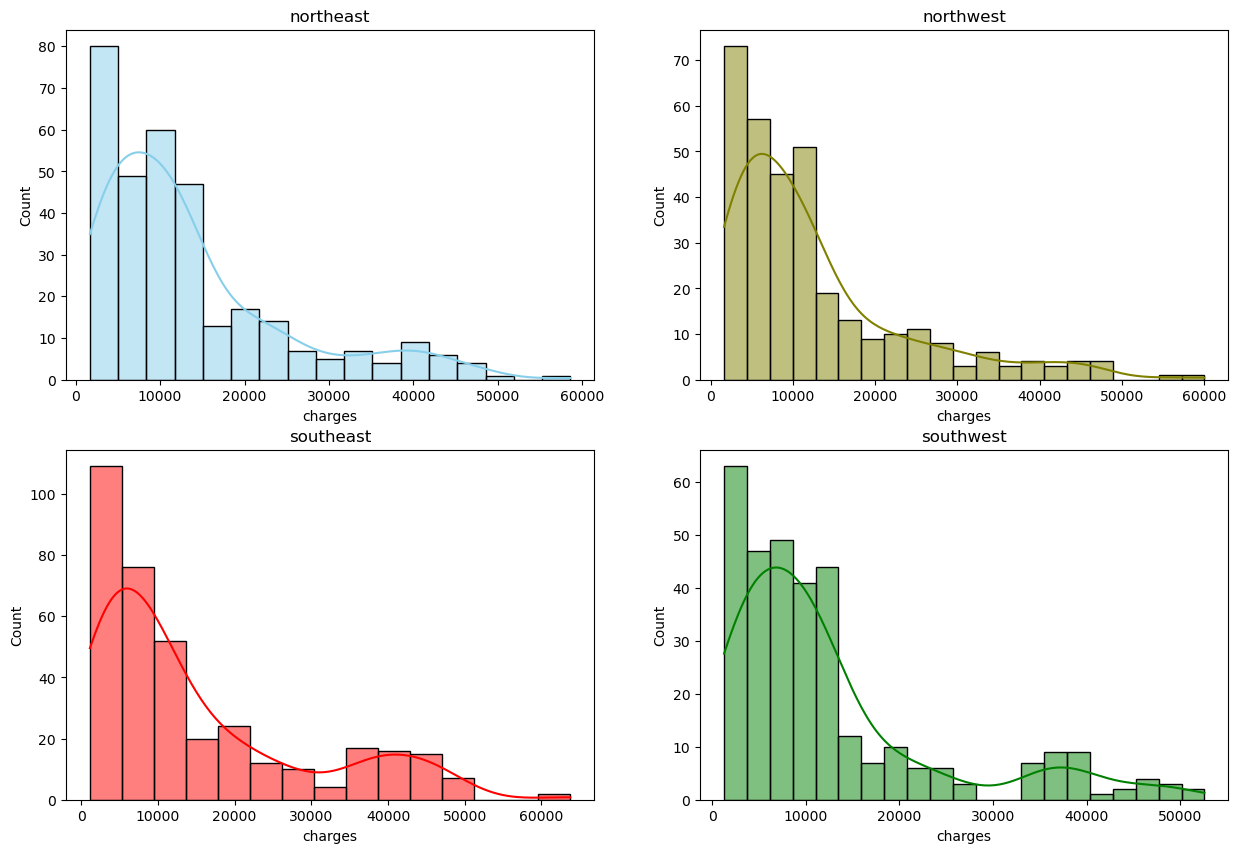

In [10]:
#ambil data-data region
region = sorted(list(asuransi["region"].unique()))
color = ["skyblue", "olive", "red", "green"]

fig, axes = plt.subplots(2, 2, figsize=(15,10))
for i in range(2):
    for j in range(2):
        sns.histplot(asuransi[asuransi["region"] == region[i*2+j]], x="charges", kde=True, color= color[i*2+j], ax=axes[i, j]).set(title=region[i*2+j])

In [11]:
asuransi.pivot_table(values="charges", index="region", aggfunc=["mean", "median"])

,mean,median
,charges,charges
region,,
northeast,13406.384516,10057.652025
northwest,12417.575374,8965.795750
southeast,14735.411438,9294.131950
southwest,12346.937377,8798.593000


Dari data tersebut, terlihat bahwa ke-4 data region memiliki pola data yang serupa, memiliki 2 puncak, di sekitar daerah <10,000 dan puncak kedua disekitar 40,000. Data northeast memiliki nilai median yang lebih besar dibandingkan dengan ke-3 region lainnya. Median terkecil berada pada region southwest. 

#### c. Apakah setiap region memiliki proporsi data banyak orang yang sama? 

In [12]:
#menghitung proporsi data tiap region dalam %
asuransi.pivot_table(values="charges", index="region", aggfunc="count")/len(asuransi)*100

,charges
region,
northeast,24.215247
northwest,24.289985
southeast,27.204783
southwest,24.289985


Dari hasil di atas didapatkan persentase data memiliki sebaran yang hampir serupa untuk 3 region (__24%__): northeast, northwest, dan southwest, dan 1 region (__27%__) memiliki data lebih besar sebanyak kurang lebih 3% dibandingkan dengan 3 region lainnya. 

#### d. Mana yang lebih tinggi proporsi perokok atau non perokok? 

In [13]:
#menghitung proporsi data tiap jenis perokok atau non perokok dalam %
asuransi.pivot_table(values="charges", index="smoker", aggfunc="count")/len(asuransi)*100

,charges
smoker,
no,79.521674
yes,20.478326


Data nasabah asuransi lebih didominasi oleh non perokok sebesar __79.52%__ dibandingkan dengan perokok (__20.48%__). Hal ini menunjukkan bahwa dataset yang digunakan terdapat imbalance data. Namun, hal ini sebenarnya menggambarkan kasus di dunia nyata, karena jumlah non perokok memang lebih besar dibandingkan dengan perokok. (https://edition.cnn.com/2023/04/27/health/cigarette-smoking-decline/index.html)

#### e. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok? 

In [14]:
asuransi.pivot_table(values="charges", index="sex", columns="smoker" ,aggfunc="count")

smoker,no,yes
sex,,
female,547,115
male,517,159


Yang ditanyakan adalah: P(perempuan | perokok)

$$ P(perempuan | perokok) = \frac{n(perempuan \cap perokok)}{n(perokok)} $$

In [15]:
p_perempuan_perokok = 115/(115+159)
p_perempuan_perokok

0.4197080291970803

Maka peluang seseorang tersebut perempuan dan diketahui dia adalah perokok adalah sebesar __0.42__.

### Analisa Variabel Kontinu

1. Mana yang lebih mungkin terjadi <br>
    a. Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k (16,700) atau, <br>
    b. Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k.

In [16]:
#mencari peluang kejadian A P(bmi > 25 & chg > 16.7k)
bmi_atas_25_tag_16k = asuransi[(asuransi.bmi > 25) & (asuransi.charges > 16700)]
print("Jumlah data kejadian A:", len(bmi_atas_25_tag_16k))
print("Peluang kejadian A:", round(len(bmi_atas_25_tag_16k)/len(asuransi),4))

Jumlah data kejadian A: 283
Peluang kejadian A: 0.2115


In [17]:
#mencari peluang kejadian B P(bmi < 25 & chg > 16.7k)
bmi_bawah_25_tag_16k = asuransi[(asuransi.bmi < 25) & (asuransi.charges > 16700)]
print("Jumlah data kejadian B:", len(bmi_bawah_25_tag_16k))
print("Peluang kejadian B:", round(len(bmi_bawah_25_tag_16k)/len(asuransi),4))

Jumlah data kejadian B: 51
Peluang kejadian B: 0.0381


Dari perhitungan di atas didapatkan bahwa kejadian A (BMI > 25, charges> 16.7k) lebih mungkin terjadi dengan peluang sebesar 0.21 dibandingkan dengan kejadian B (BMI < 25, charges > 16.7k) dengan peluang 0.038. Hal ini menunjukkan bahwa seseorang dengan berat badan ideal dan kurus memiliki peluang nilai tagihan yang lebih kecil dibandingkan dengan orang yang overweight.

2. Mana yang lebih mungkin terjadi <br>
    a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k atau, <br>
    b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k.

In [18]:
#mencari peluang kejadian A P(bmi > 25 & chg > 16.7k | perokok)
bmi_perokok_atas_25_tag_16k = asuransi_perokok[(asuransi_perokok.bmi > 25) & (asuransi_perokok.charges > 16700)]
print("Jumlah data kejadian A:", len(bmi_perokok_atas_25_tag_16k))
print("Peluang kejadian A:", round(len(bmi_perokok_atas_25_tag_16k)/len(asuransi_perokok),4))

Jumlah data kejadian A: 215
Peluang kejadian A: 0.7847


In [135]:
#mencari peluang kejadian B P(bmi > 25 & chg > 16.7k | non-perokok)
bmi_non_perokok_bawah_25_tag_16k = asuransi_non_perokok[(asuransi_non_perokok.bmi < 25) & (asuransi_non_perokok.charges > 16700)]
print("Jumlah data kejadian B:", len(bmi_non_perokok_bawah_25_tag_16k))
print("Peluang kejadian B:", round(len(bmi_non_perokok_bawah_25_tag_16k)/len(asuransi_non_perokok),4))

Jumlah data kejadian B: 12
Peluang kejadian B: 0.0113


Dari perhitungan di atas didapatkan pada kejadian A & B, yaitu:
- P(bmi > 25 & chg > 16.7k | perokok) : 0.78
- P(bmi < 25 & chg > 16.7k | perokok) : 0.01


Ketika diketahui seseorang merokok, maka peluang orang tersebut jika BMI > 25 untuk membayar tagihan > 16.7k sebesar 0.78, lebih besar dari pada seseorang yang tidak merokok, memiliki BMI > 25 & tagihan > 16.7k, dengan peluang sebesar 0.01.

### Analisa Korelasi Variabel

Pada korelasi variabel, akan dilakukan hubungan antara nilai BMI dengan variabel tanggungan anak. 

<AxesSubplot:xlabel='children', ylabel='bmi'>

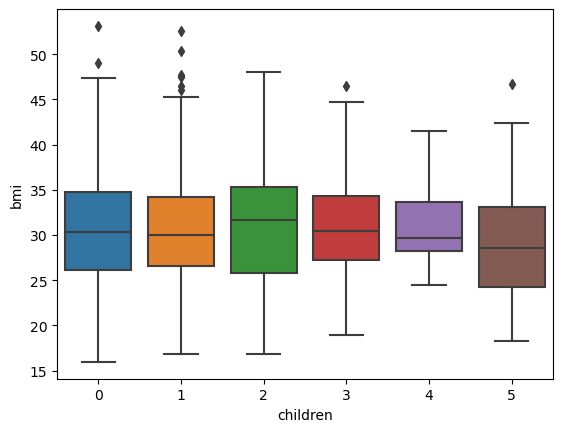

In [20]:
sns.boxplot(data=asuransi, x="children", y="bmi")

<AxesSubplot:xlabel='children', ylabel='bmi'>

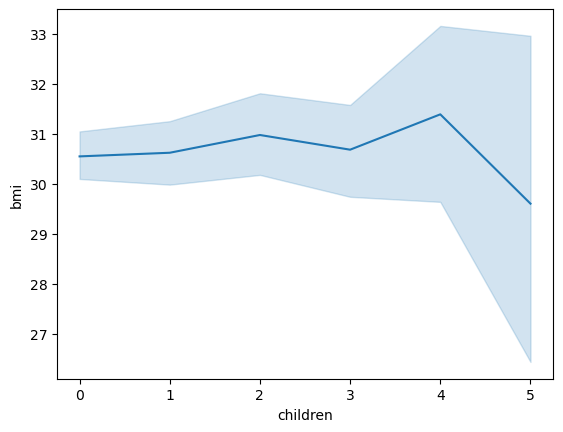

In [21]:
sns.lineplot(data=asuransi, x="children", y="bmi")

Dari ke-2 plot di atas dapat dilihat bahwa nasabah yang memiliki jumlah 1-3 anak, memiliki rata-rata/median nilai BMI yang tidak banyak berubah. Nilai BMI memiliki variasi besar ketika jumlah anak terdiri dari 4 atau 5 anak. Nilai korelasi dapat dicari dengan menggunakan fungsi corr(). 

In [22]:
asuransi[["bmi","children"]].corr()

,bmi,children
bmi,1.000000,0.012759
children,0.012759,1.000000


Dengan bentuk plot tersebut, serta nilai korelasi antara BMI & children yang mendekati nol (0.013), memberikan informasi kepada kita bahwa ke-2 variabel tidak berkorelasi. Jumlah anak yang semakin banyak tidak memengaruhi nilai bmi dari seseorang.

### Pengujian Hipotesis

3 Hipotesis yang akan diuji pada project ini antara lain:
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Proporsi perokok laki-laki lebih besar dari perempuan
3. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25.

#### 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [55]:
asuransi.pivot_table(values="charges", index="smoker", aggfunc=["mean", "median", "std"])

,mean,median,std
,charges,charges,charges
smoker,,,
no,8434.268298,7345.40530,5993.781819
yes,32050.231832,34456.34845,11541.547176


Untuk simplisitas, kita akan membandingkan kedua nilai mean dari perokok dan non-perokok. Dari data di atas, mean tagihan perokok = USD 32,050, sedangkan mean tagihan non perokok = USD 8,434. Nilainya terlampau jauh, namun seberapa yakin kita bahwa nilai tagihan perokok lebih tinggi daripada yang bukan?

Maka dari itu, dilakukan uji statistik. Langkah pertama yang dilakukan adalah pembentukan hipotesis: <br>
1.1. Hipotesis yang diuji:
$$H_0: \mu_{perokok} \leq \mu_{non perokok}$$
$$H_1: \mu_{perokok} > \mu_{non perokok}$$

1.2. Tentukan statistik uji
Menggunakan t-test pada 2 sampel, karena tidak memiliki data keseluruhan populasi. 

1.3. Aturan Keputusan
- Alpha = 0.05
- Uji pihak kanan (dalam $H_1$ mengandung tanda $>$)

1.4. Hitung statistik uji

In [57]:
# Langkah pertama adalah check variance dari kedua populasi
np.var(asuransi_perokok.charges), np.var(asuransi_non_perokok.charges)

(132721153.13625304, 35891656.00316425)

In [61]:
from scipy.stats import ttest_ind

alpha = 0.05
stat, p = ttest_ind(a = asuransi_perokok.charges, b = asuransi_non_perokok.charges, equal_var=False, alternative='greater')

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 32.7519, p-value = 0.0000


1.5. Pengambilan Keputusan

In [62]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


Maka dapat disimpulkan bahwa tagihan kesehatan perokok lebih besar daripada tagihan non perokok. Dari pengujian di atas, didapatkan bahwa nilai p-value kurang dari nilai alpha, sehingga kita bisa menolak $H_0$, yaitu keadaan ketika mean tagihan perokok kurang dari sama dengan mean tagihan non perokok.

#### 2. Proporsi perokok laki-laki lebih besar dari perempuan

In [65]:
pivot_proporsi = asuransi.pivot_table(values="charges", index="sex", columns="smoker", aggfunc="count")
pivot_proporsi

smoker,no,yes
sex,,
female,547,115
male,517,159


In [92]:
total_laki = pivot_proporsi.loc["male",].sum()
total_perempuan = pivot_proporsi.loc["female",].sum()
proporsi_perokok_laki = round(pivot_proporsi.loc["male","yes"]/total_laki,2)
proporsi_perokok_perempuan = round(pivot_proporsi.loc["female","yes"]/total_perempuan,2)

In [98]:
print(f"Proporsi perokok laki-laki dari total sampel laki-laki({total_laki} orang): {proporsi_perokok_laki}")
print(f"Proporsi perokok perempuan dari total sampel perempuan({total_perempuan} orang): {proporsi_perokok_perempuan}")

Proporsi perokok laki-laki dari total sampel laki-laki(676 orang): 0.24
Proporsi perokok perempuan dari total sampel perempuan(662 orang): 0.17


Diketahui bahwa proporsi perokok laki-laki adalah 159 dari 676 orang (0.24). Sedangkan proposi perempuan adalah 115 dari 662 orang (0.17). Apakah kedua proporsi tersebut dapat dikatakan sama? Hal ini dapat diperiksa menggunakan uji hipotesis proporsi dua populasi, menggunakan distribusi z. 
$$ z = \frac{\hat{p}_1-\hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}} $$

dengan,
$$ \hat{p} = \frac{x_1+x_2}{n_1+n_2} $$

2.1. Hipotesis
$$ H_0 : p_{laki} \leq p_{perempuan}$$
$$ H_1 : p_{laki} > p_{perempuan}$$

2.2. Uji Statistik
Menggunakan uji hipotesis proporsi dua populasi

2.3. Aturan Keputusan

nilai alpha = 0.05
uji pihak kanan

2.4. Hitung Statistik Uji

In [108]:
#memasukkan variabel jumlah perokok dan total ukuran sampelnya
jumlah_perokok = np.array([pivot_proporsi.loc["male","yes"], pivot_proporsi.loc["female","yes"]])
total_sampel = np.array([total_laki, total_perempuan])

In [114]:
#import package
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

# Hitung uji statistik dan p_value
(test_stat, p_value) = proportions_ztest(jumlah_perokok, total_sampel,alternative='larger')
print("Perhitungan z statistik: ",test_stat)
print("Nilai p-value: ", p_value)

Perhitungan z statistik:  2.7867402154855503
Nilai p-value:  0.002662057082160266


2.5. Pengambilan Keputusan

In [115]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


Dari hasil di atas didapatkan bahwa p-value (0.003) kurang dari nilai alpha (0.05), hal ini memberikan kita keyakinan untuk menolak $H_0$. Maka dari itu proporsi perokok laki-laki memang lebih besar dari proporsi perokok perempuan.

#### 3. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25.

Hal yang harus dilakukan adalah menambahkan kolom yang memberikan keterangan apakah nilainya di atas 25 atau di bawah 25, sebut saja dengan istilah "upper_25" & "lower_25". 

In [122]:
asuransi_baru = asuransi
asuransi_baru["bmi_25"] = ["upper_25" if x >= 25 else "lower_25" for x in asuransi_baru.bmi]
asuransi_baru.head()

,age,sex,bmi,children,smoker,region,charges,bmi_25
0,19,female,27.900,0,yes,southwest,16884.92400,upper_25
1,18,male,33.770,1,no,southeast,1725.55230,upper_25
2,28,male,33.000,3,no,southeast,4449.46200,upper_25
3,33,male,22.705,0,no,northwest,21984.47061,lower_25
4,32,male,28.880,0,no,northwest,3866.85520,upper_25


In [123]:
asuransi_baru.pivot_table(values="charges", index="bmi_25", aggfunc=["mean", "median", "std"])

,mean,median,std
,charges,charges,charges
bmi_25,,,
lower_25,10282.224474,8582.3023,7520.485850
upper_25,13940.237872,9563.0290,12824.401478


Dari pivot tabel didapatkan bahwa $\mu_{upper}$ memiliki nilai USD 13,940 lebih tinggi dibandingkan dengan nilai $\mu_{lower}$ yang bernilai USD 10,282.

Dilakukan uji statistik. Langkah pertama yang dilakukan adalah pembentukan hipotesis: <br>
3.1. Hipotesis yang diuji:
$$H_0: \mu_{upper 25} \leq \mu_{lower 25}$$
$$H_1: \mu_{upper 25} > \mu_{lower 25}$$

3.2. Tentukan statistik uji
Menggunakan t-test pada 2 sampel, karena tidak memiliki data keseluruhan populasi. 

3.3. Aturan Keputusan
- Alpha = 0.05
- Uji pihak kanan (dalam $H_1$ mengandung tanda $>$)

3.4. Hitung statistik uji

In [130]:
asuransi_bmi_up_25 = asuransi_baru[asuransi_baru["bmi_25"] == "upper_25"]
asuransi_bmi_down_25 = asuransi_baru[asuransi_baru["bmi_25"] == "lower_25"]

In [131]:
from scipy.stats import ttest_ind

alpha = 0.05
stat, p = ttest_ind(a = asuransi_bmi_up_25.charges, b = asuransi_bmi_down_25.charges, equal_var=False, alternative='greater')

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

Statistics = 5.9238, p-value = 0.0000


3.5. Pengambilan Keputusan

In [132]:
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


Maka dapat disimpulkan bahwa tagihan seseorang dengan BMI di atas 25 akan mendapatkan nilai tagihan yang lebih besar dibandingkan dengan orang yang memiliki BMI < 25. Hal ini secara logis benar, karena orang dengan berat badan berlebihan berisiko lebih besar untuk mendapatkan penyakit yang lebih mematikan.